In [9]:


!pip install seaborn

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Problem Statement
Build a model which predicts sales based on the money spent on different platforms for marketing.

Data

Use the advertising dataset given in ISLR and analyse the relationship between 'TV advertising' and 'sales' 

using a simple linear regression model. You can use scikit-learn to train linear regression.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns

In [25]:
%pip install seaborn

You should consider upgrading via the 'python -m pip install --upgrade pip' command.



                                              0.0/294.6 kB ? eta -:--:--
     ----                                     30.7/294.6 kB ? eta -:--:--
     -----                                 41.0/294.6 kB 393.8 kB/s eta 0:00:01
     -------------                        112.6/294.6 kB 819.2 kB/s eta 0:00:01
     -----------------                    143.4/294.6 kB 853.3 kB/s eta 0:00:01
     ------------------------------         235.5/294.6 kB 1.1 MB/s eta 0:00:01
     ------------------------------------   286.7/294.6 kB 1.1 MB/s eta 0:00:01
     ------------------------------------   286.7/294.6 kB 1.1 MB/s eta 0:00:01
     ------------------------------------   286.7/294.6 kB 1.1 MB/s eta 0:00:01
     ------------------------------------   286.7/294.6 kB 1.1 MB/s eta 0:00:01
     ------------------------------------ 294.6/294.6 kB 673.8 kB/s eta 0:00:00
                                              0.0/7.6 MB ? eta -:--:--
     -                                        0.2/7.6 MB 14.1


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
data=pd.read_csv(r"C:\Users\hp\OneDrive\Masaüstü\advertising.csv")

In [12]:
if data.isnull().sum().sum()==0 and data.isnull().sum().sum()==0:
    print("THERE IS NO NULL VALUE IN YOUR DATA")
else:
    print('your data contains :', data.isnull().sum().sum(), "null value")

THERE IS NO NULL VALUE IN YOUR DATA


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [14]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<Axes: >

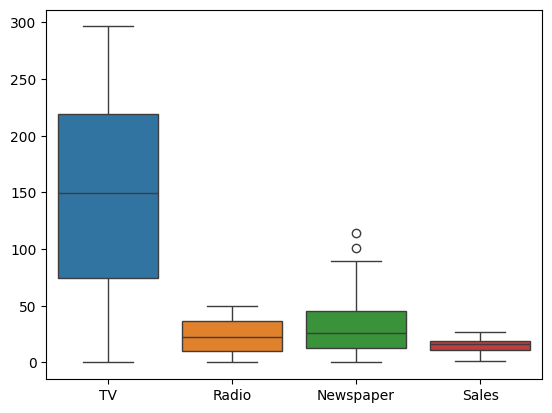

In [15]:
sns.boxplot(data)

Seems like only column Newspapers has few outliers

[Text(0.5, 1.0, 'Correlation between Sales and TV expenditure')]

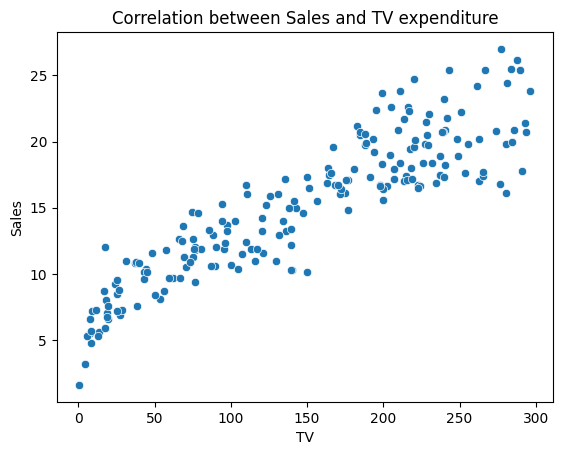

In [16]:
sns.scatterplot(data=data, x="TV",y="Sales").set(title="Correlation between Sales and TV expenditure")

In [17]:

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

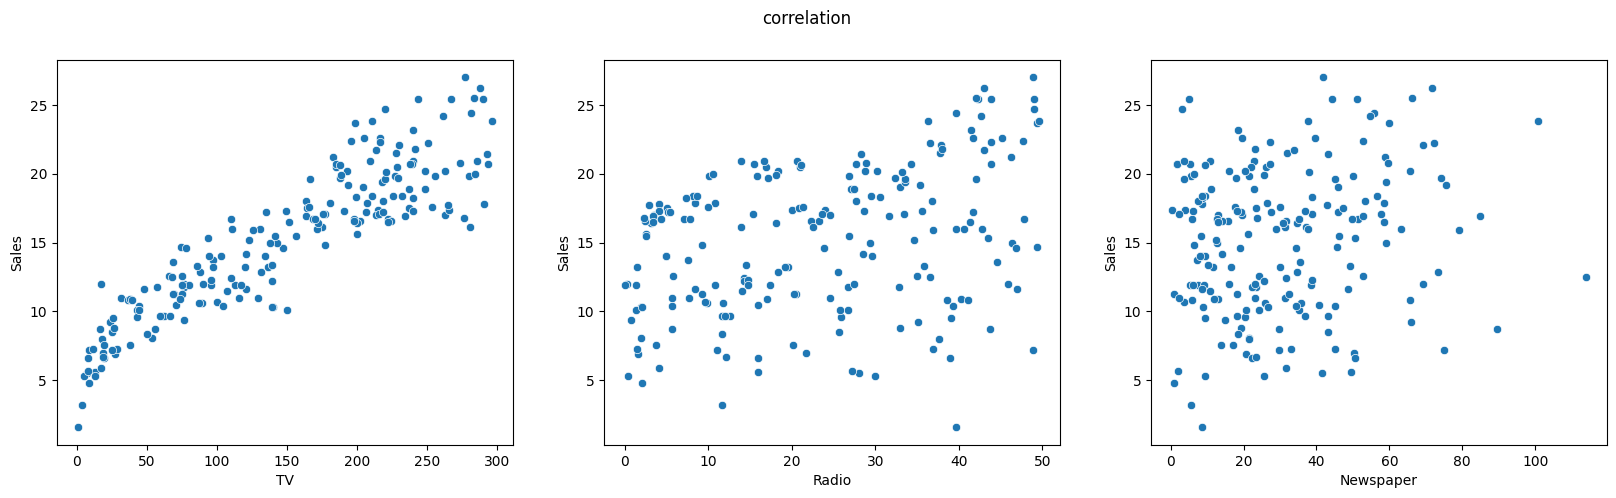

In [18]:
fig, axes = plt.subplots(1,3, figsize=(20,5))
 
fig.suptitle('correlation')
sns.scatterplot(ax=axes[0], data=data, x='TV', y='Sales')
sns.scatterplot(ax=axes[1], data=data, x='Radio', y='Sales')
sns.scatterplot(ax=axes[2], data=data, x='Newspaper', y='Sales')
plt.show()

# seems like only TV and Sales has the linear correlation

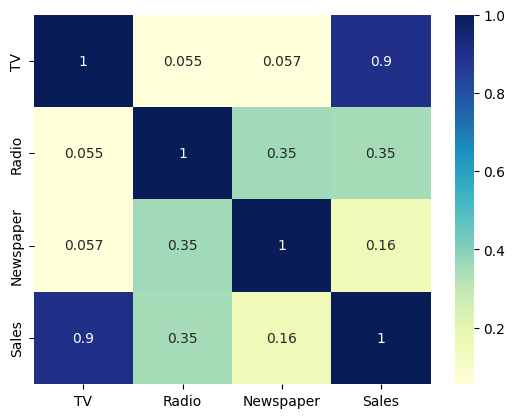

In [19]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [20]:
#So it is so obvious that Money spend on Tv advertisement directly has strong affect on Sales in a posictive way.

In [21]:
data.drop(["Newspaper","Radio"],axis=1,inplace=True)

In [22]:
data

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9
...,...,...
195,38.2,7.6
196,94.2,14.0
197,177.0,14.8
198,283.6,25.5


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [53]:
x=data[["TV"]]
Y=data[["Sales"]]
x_train,x_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.1)

In [54]:
x_train
Y_train

,Sales
112,17.1
129,9.7
58,23.8
39,21.5
6,11.8
...,...
169,20.0
97,20.5
165,16.9
122,16.6


In [55]:
regressor=LinearRegression()

In [56]:
model=regressor.fit(x_train,Y_train)

In [57]:
Y_pred=model.predict(x_test)

In [58]:
Y_test.to_numpy()

array([[18.9],
       [ 7. ],
       [16.1],
       [14.6],
       [11.9],
       [18. ],
       [11.9],
       [11.3],
       [11.3],
       [17.5],
       [15. ],
       [ 6.7],
       [27. ],
       [18.4],
       [16.4],
       [16.6],
       [ 8.7],
       [21.4],
       [18. ],
       [18.3]])

In [59]:
a={"Actual":Y_test.to_numpy(),"Predicted":Y_pred}

In [60]:
DF=pd.DataFrame()
DF["actual value"]=Y_test
DF["Predicted value"]=Y_pred

In [61]:
DF

,actual value,Predicted value
28,18.9,20.871029
121,7.0,7.999187
150,16.1,22.656297
19,14.6,15.190629
127,11.9,11.435409
20,18.0,19.169707
191,11.9,11.172376
18,11.3,10.819799
65,11.3,10.808606
171,17.5,16.153219


In [62]:
from sklearn import metrics
print(metrics.r2_score(Y_test,Y_pred))
print(np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))
print(metrics.mean_absolute_error(Y_test,Y_pred))

0.807832306174563
2.1266336286099556
1.5087366348436595


In [63]:
y_train_predict=model.predict(x_train)

In [64]:
print("Train R2")
metrics.r2_score(Y_train,y_train_predict)

Train R2


0.8124117724548703

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
lm_cv=LinearRegression()
cv_pred=cross_val_predict(estimator=lm_cv,X=x_train, y=Y_train,cv=5)
print("Cv_predicted evaluations")
print("accuracy score: ", metrics.r2_score(y_true=Y_train,y_pred=cv_pred))


Cv_predicted evaluations
accuracy score:  0.8083800462900472
